# K-Mean Clustering Market Segmentation

Import libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data sets

In [71]:
datasets = pd.read_csv("C:\\Users\\oliva\\Desktop\\Python_Tutorials\\Machine Learning Excercises\\sample_datasets\\market_segmentation.csv")
datasets.head(5)

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


Explore the data

In [72]:
datasets.describe()

,Satisfaction,Loyalty
count,30.000000,30.000000
mean,6.400000,0.001000
std,2.620871,1.016476
min,1.000000,-1.690000
25%,4.250000,-0.967500
50%,7.000000,0.150000
75%,8.750000,0.947500
max,10.000000,1.380000


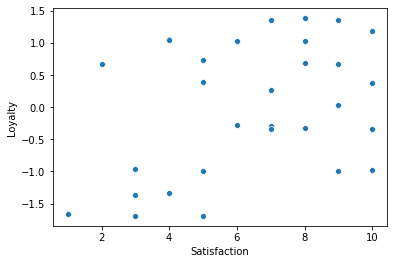

In [81]:
sns.scatterplot(x= datasets["Satisfaction"],y= datasets["Loyalty"])

Normalized value for "Loyalty"

In [84]:
from sklearn import preprocessing
scaled = preprocessing.scale(datasets)
scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

Choosing K using Elbow Method

In [86]:
square_error = []
# Range were base from standard scale from SATISFACTION score (1-10; 10 is being the highest satisfaction )
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(scaled)
    square_error.append(kmeans.inertia_)

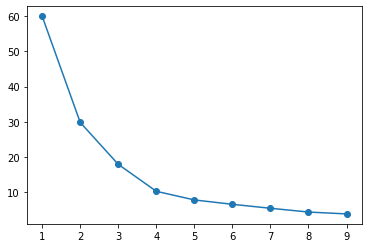

In [93]:
#Check for K. Wil choose 4 as the K value.
satisfaction_score = range(1,10)
plt.plot(satisfaction_score,square_error, marker="o")

Cluster Prediction

In [145]:
#Clustering using 3 K values (but K can be 2,3,4 or 5)
kmeans = KMeans(n_clusters= 3,random_state=42)

#Fit model
kmeans.fit(datasets)

#Prediction
prediction = kmeans.predict(datasets)

#Create new copy
new_data = datasets.copy() 

#Join predicted data to new data table
new_data["prediction"] = prediction

In [146]:
new_data.head(10)

,Satisfaction,Loyalty,prediction
0,4,-1.33,0
1,6,-0.28,2
2,5,-0.99,2
3,7,-0.29,2
4,4,1.06,0
5,1,-1.66,0
6,10,-0.97,1
7,8,-0.32,1
8,8,1.02,1
9,8,0.68,1


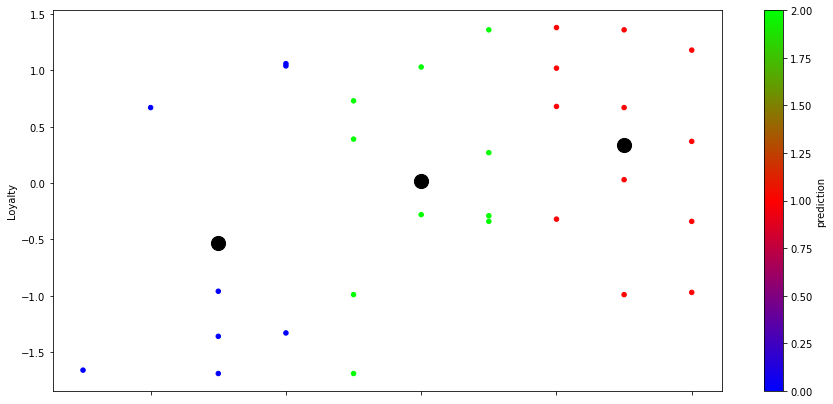

In [147]:
new_data.plot.scatter(x="Satisfaction",y="Loyalty",c="prediction",cmap="brg",figsize=(15,7))

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1], s=200, color='black')

Inspecting per Cluster 

In [148]:
cluster_1 = new_data[new_data["prediction"]==0]
cluster_1.describe()

# Low satisfaction and Low Loyalty

,Satisfaction,Loyalty,prediction
count,8.000000,8.000000,8.0
mean,3.000000,-0.528750,0.0
std,1.069045,1.228779,0.0
min,1.000000,-1.690000,0.0
25%,2.750000,-1.435000,0.0
50%,3.000000,-1.145000,0.0
75%,4.000000,0.762500,0.0
max,4.000000,1.060000,0.0


In [150]:
cluster_2 = new_data[new_data["prediction"]==1]
cluster_2.describe()

#High Satisfaction and High Loyalty

,Satisfaction,Loyalty,prediction
count,12.000000,12.000000,12.0
mean,9.000000,0.339167,1.0
std,0.852803,0.852509,0.0
min,8.000000,-0.990000,1.0
25%,8.000000,-0.325000,1.0
50%,9.000000,0.520000,1.0
75%,10.000000,1.060000,1.0
max,10.000000,1.380000,1.0


In [151]:
cluster_3 = new_data[new_data["prediction"]==2]
cluster_3.describe()

#Mid Satisfaction and Mid Loyalty

,Satisfaction,Loyalty,prediction
count,10.000000,10.000000,10.0
mean,6.000000,0.019000,2.0
std,0.942809,0.929701,0.0
min,5.000000,-1.690000,2.0
25%,5.000000,-0.327500,2.0
50%,6.000000,-0.005000,2.0
75%,7.000000,0.645000,2.0
max,7.000000,1.360000,2.0
